In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

import seaborn as sns 
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np 

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet

In [3]:
df=pd.read_csv('BankChurners.csv')
#Viewing top 2 rows 

df.head(2)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9


In [4]:
cols_to_consider=['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

In [5]:
subset=df[cols_to_consider]
subset.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
subset.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [7]:
scaler=StandardScaler()
subset_scaled=scaler.fit_transform(subset)

In [8]:
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

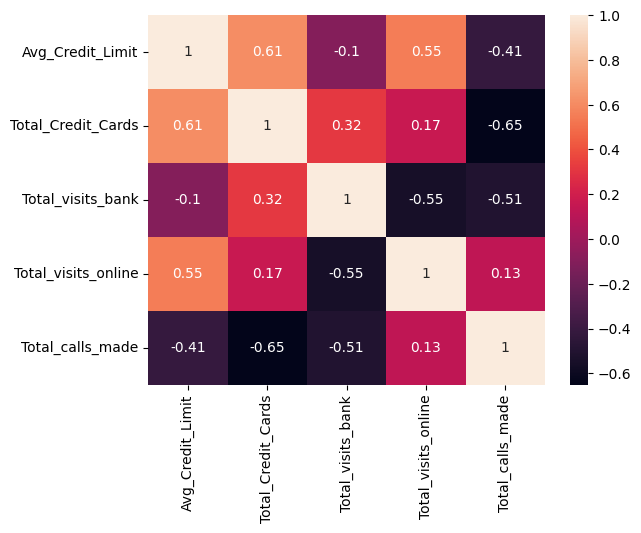

In [9]:
sns.heatmap(subset_scaled_df.corr(),annot=True)
plt.show()

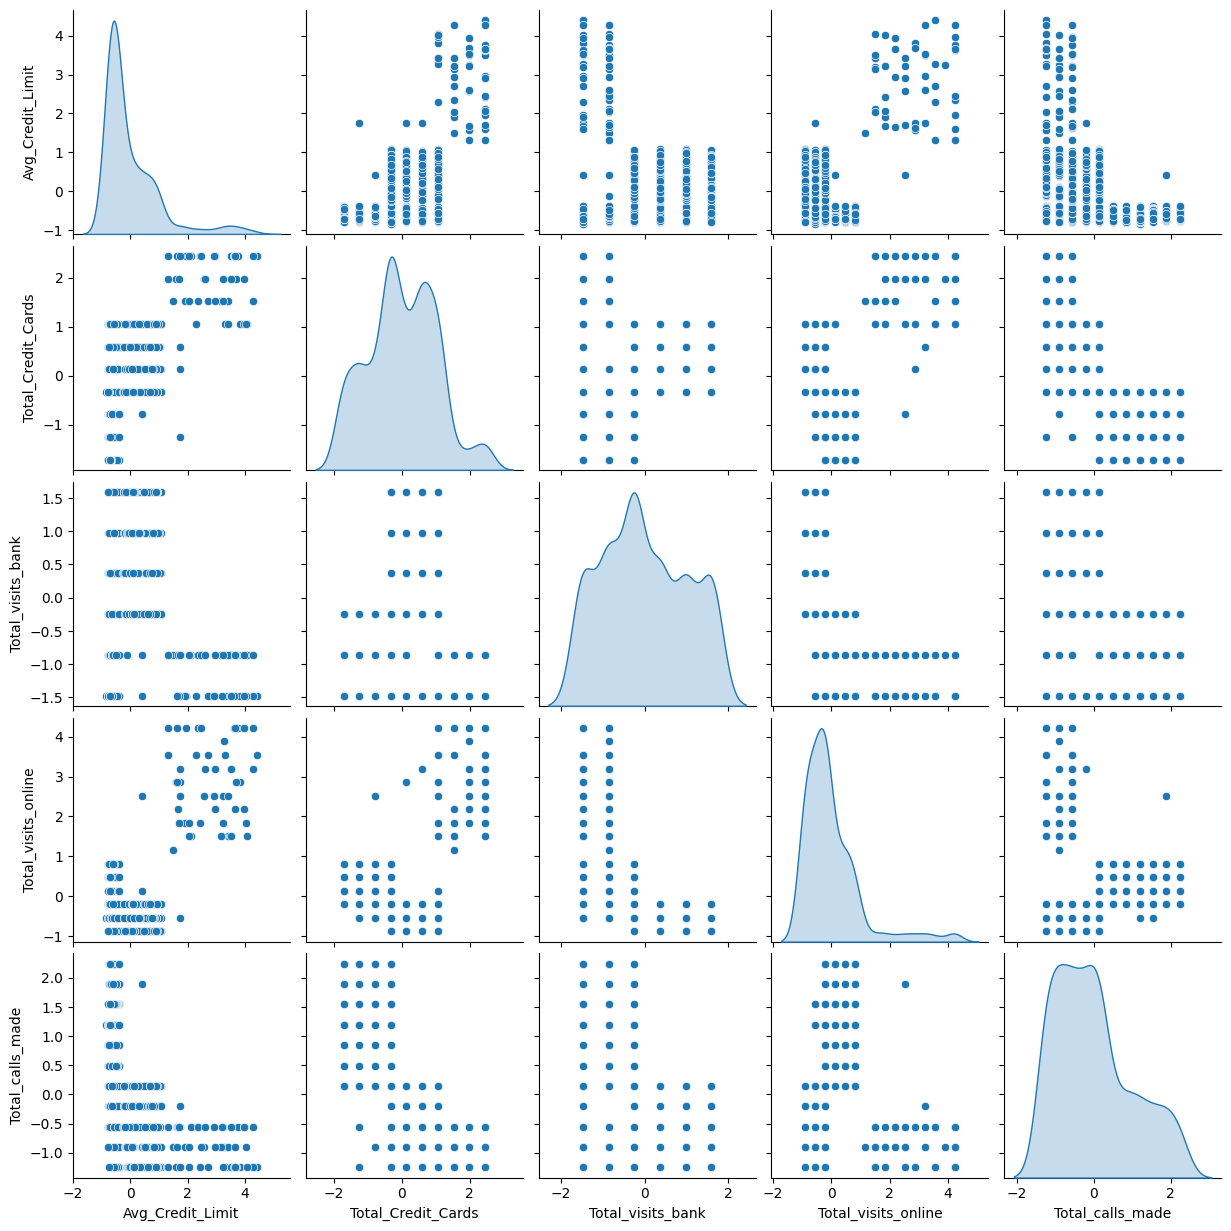

In [10]:
sns.pairplot(subset_scaled_df,diag_kind="kde")

1 2.0069222262503614
2 1.4571553548514269
3 1.1466276549150365
4 1.0463825294774465
5 0.9908683849620168
6 0.9429882588535909
7 0.9094338291863263
8 0.8903846472524303
9 0.8633590848504856


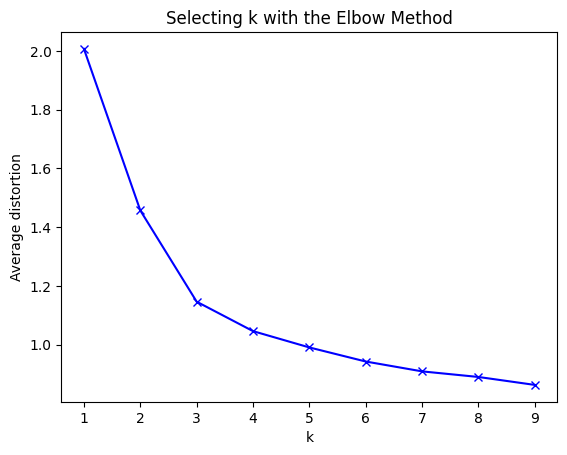

In [11]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print(k,distortion)
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [13]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [14]:
centroid_df = pd.DataFrame(centroids, columns = subset_scaled_df.columns )
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


In [15]:
dataset=subset_scaled_df[:]  #creating a copy of the data 
dataset['KmeansLabel']=kmeans.labels_
dataset.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KmeansLabel
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,0
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,2
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,0
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,0
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,0


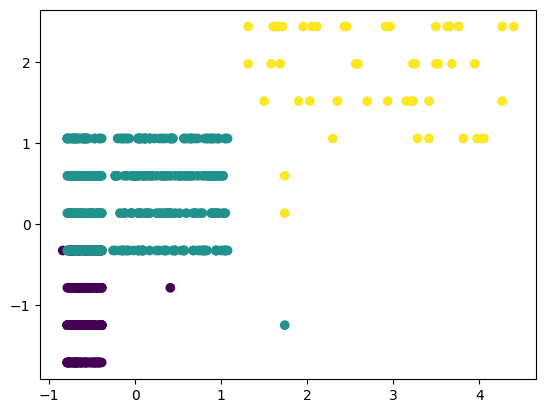

In [16]:
plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_Credit_Cards'], c=kmeans.labels_,)  
plt.show()

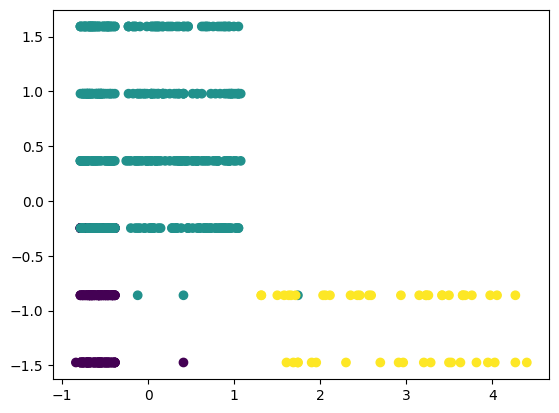

In [17]:
plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_visits_bank'], c=kmeans.labels_,)  
plt.show()

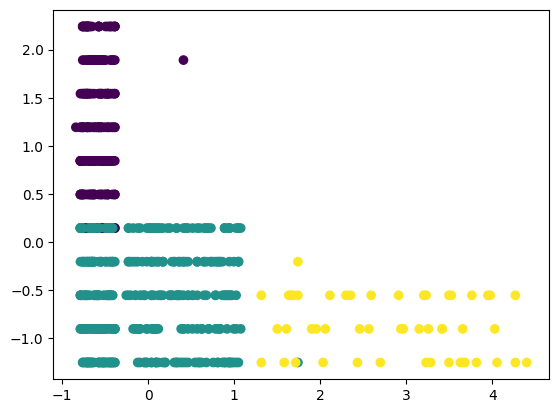

In [18]:
plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_calls_made'], c=kmeans.labels_,)  
plt.show()

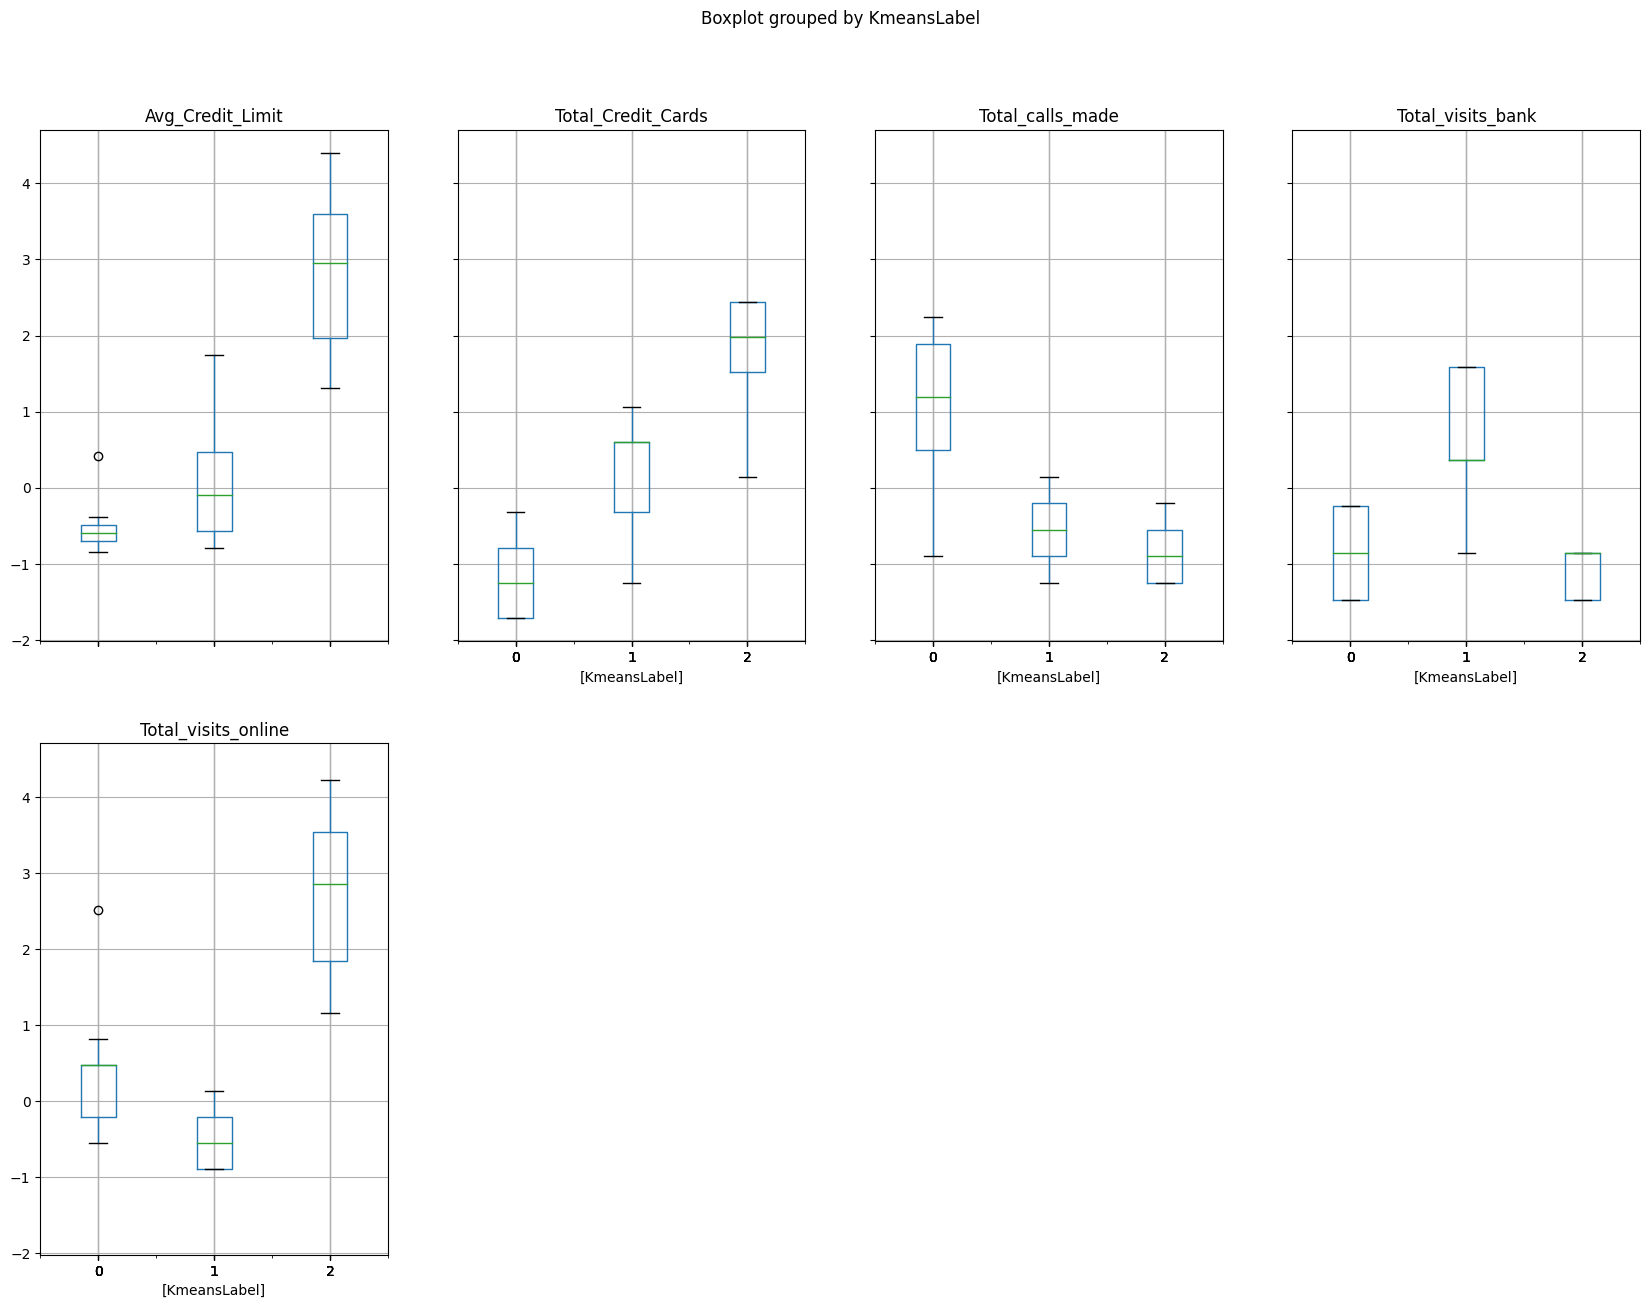

In [19]:
dataset.boxplot(by = 'KmeansLabel',  layout=(2,4), figsize=(20, 15))
plt.show()

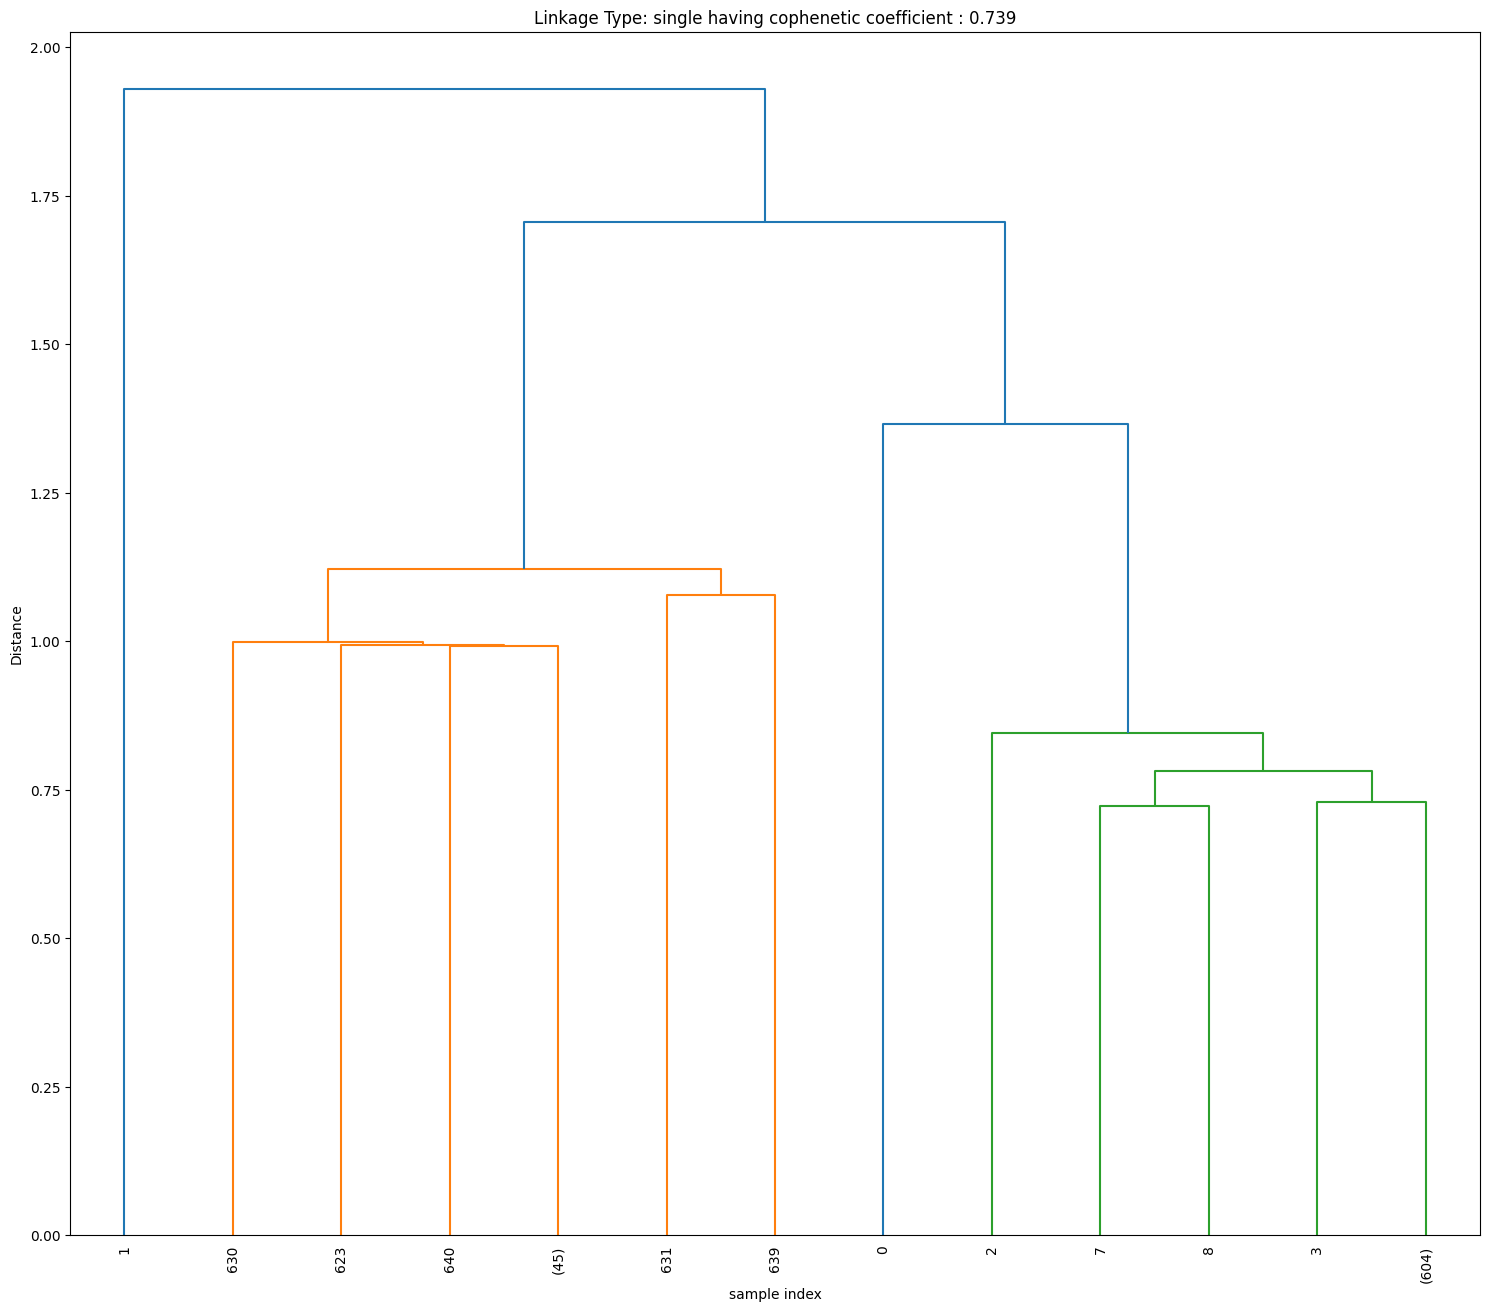

single 0.7391220243806552


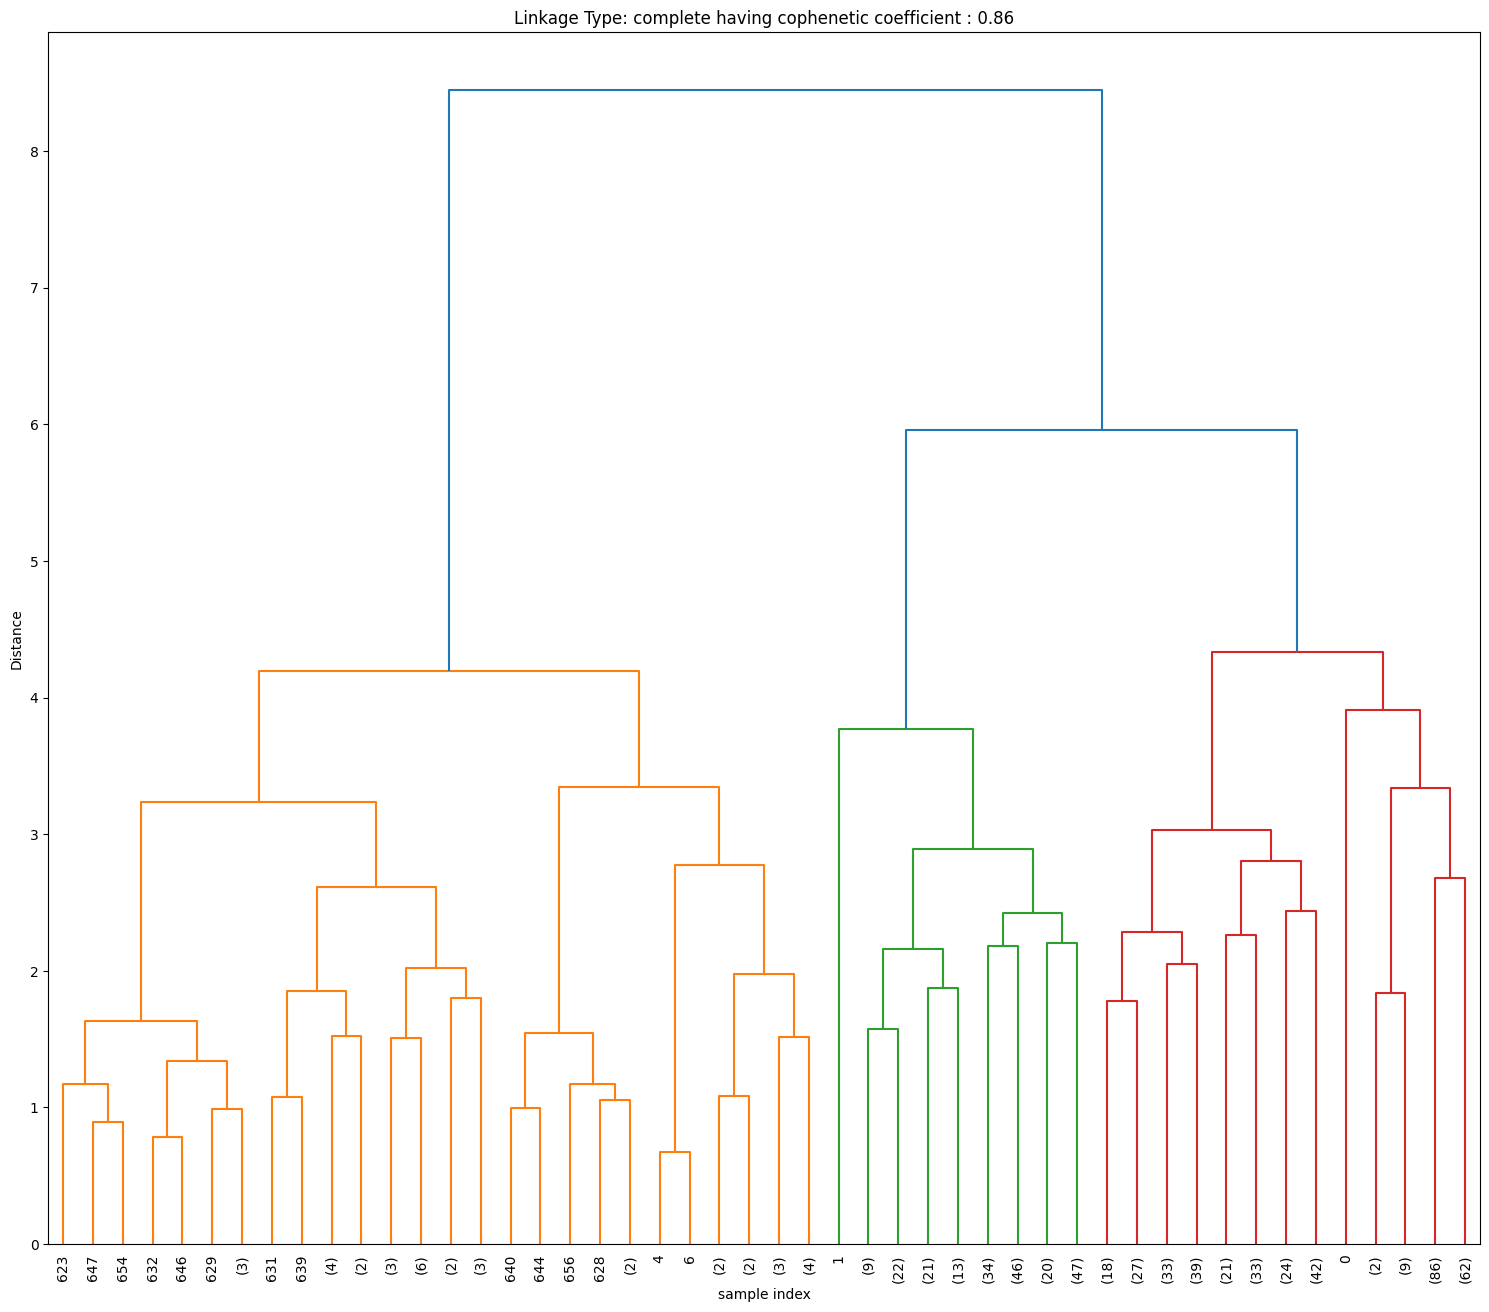

complete 0.8599730607972423


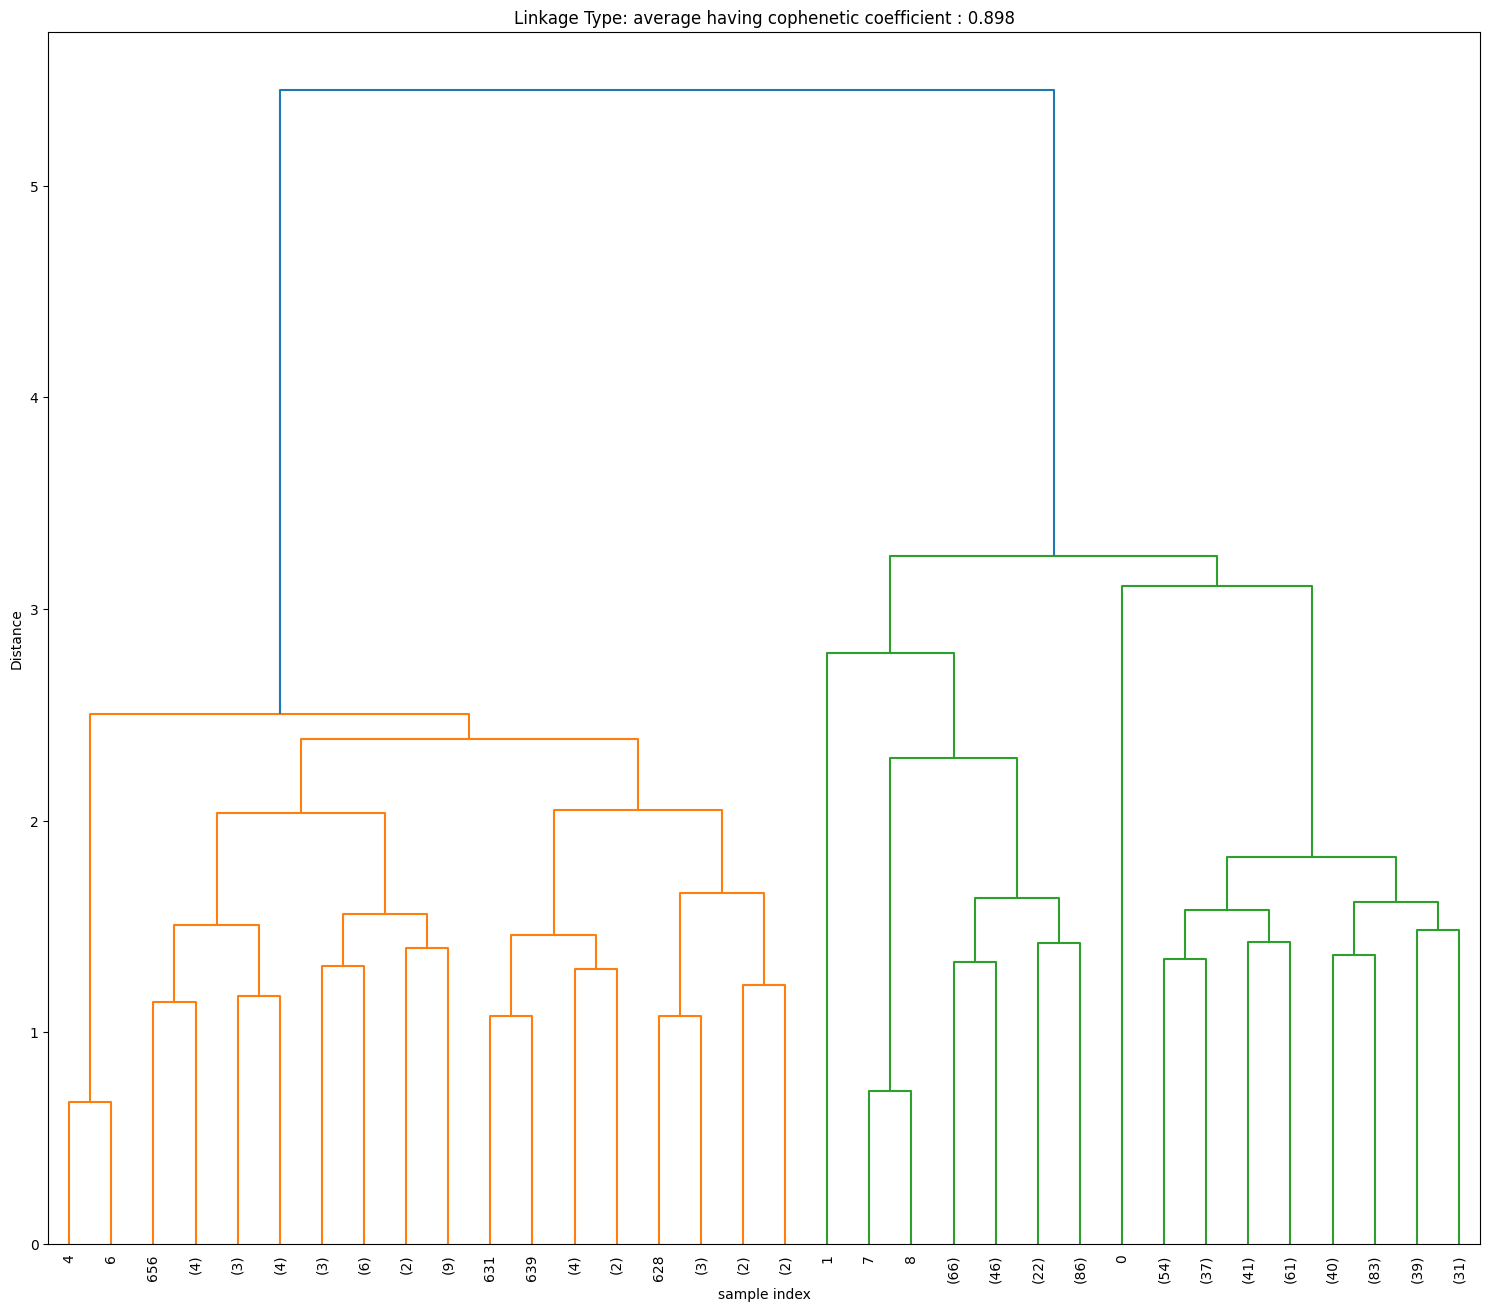

average 0.8977080867389372


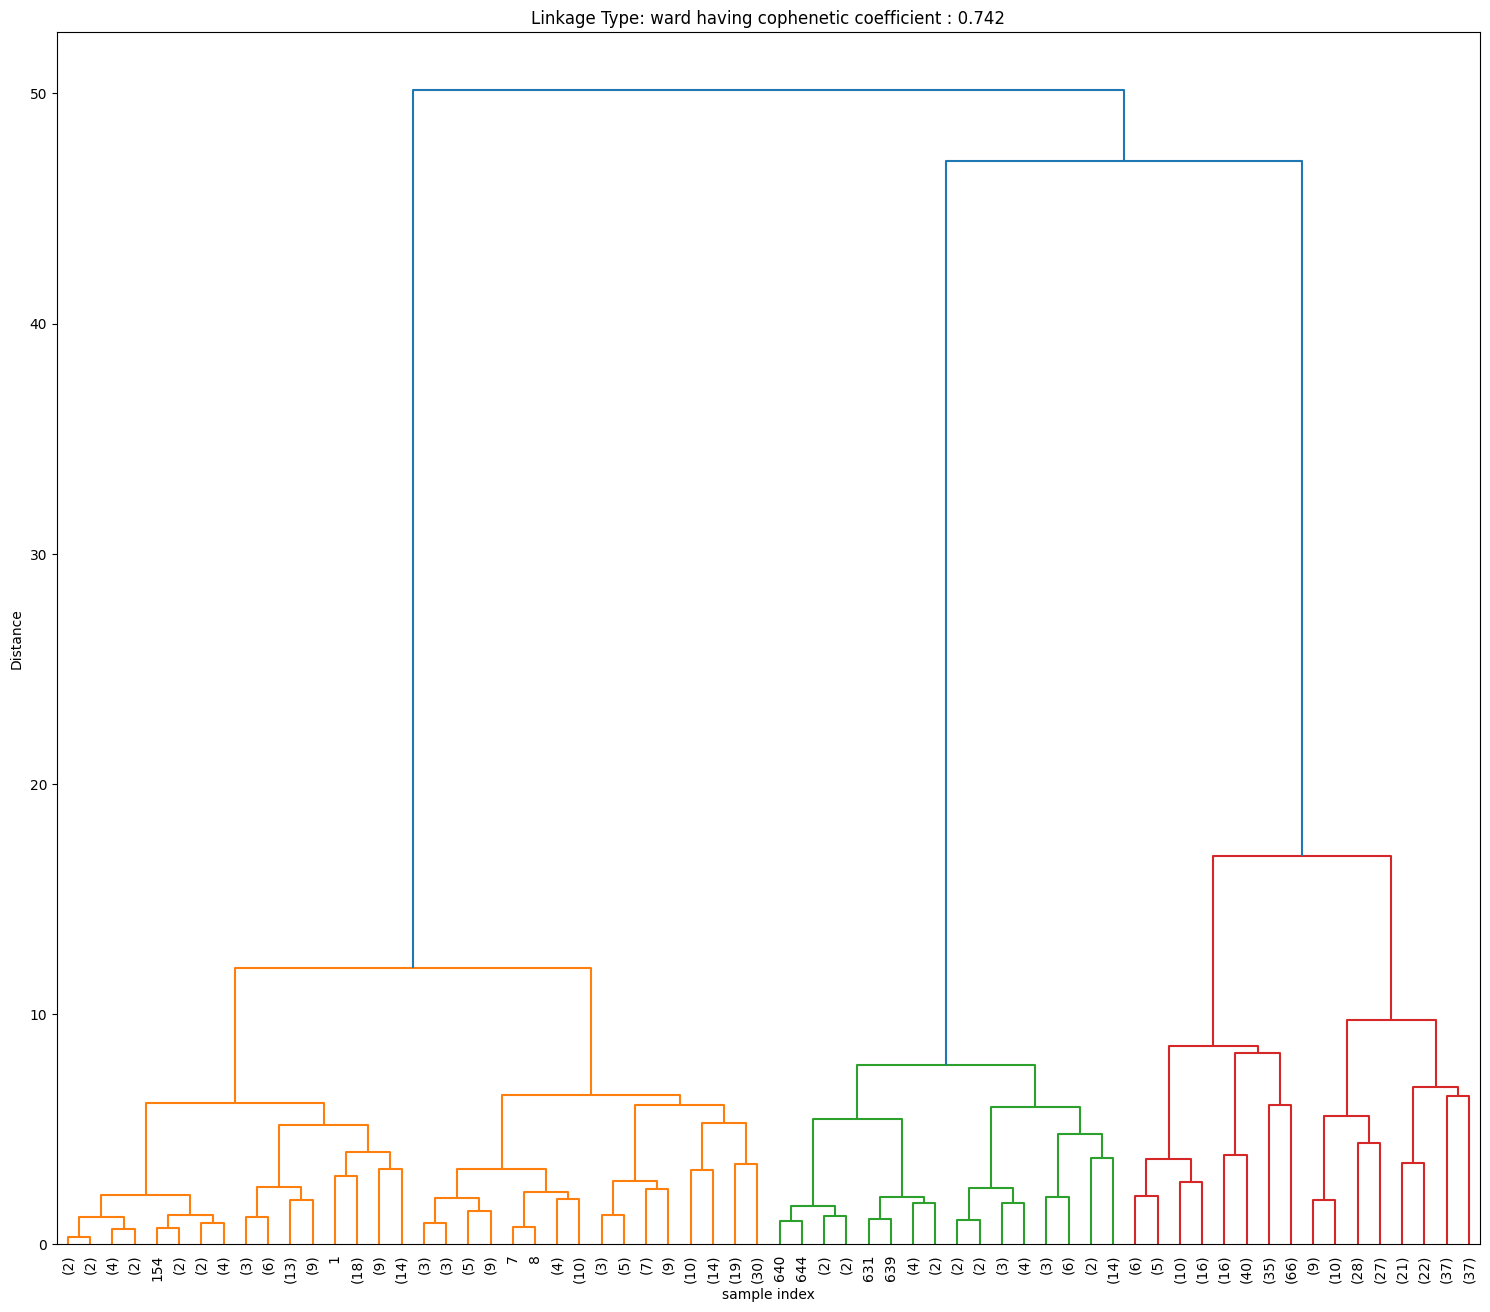

ward 0.7415156284827493


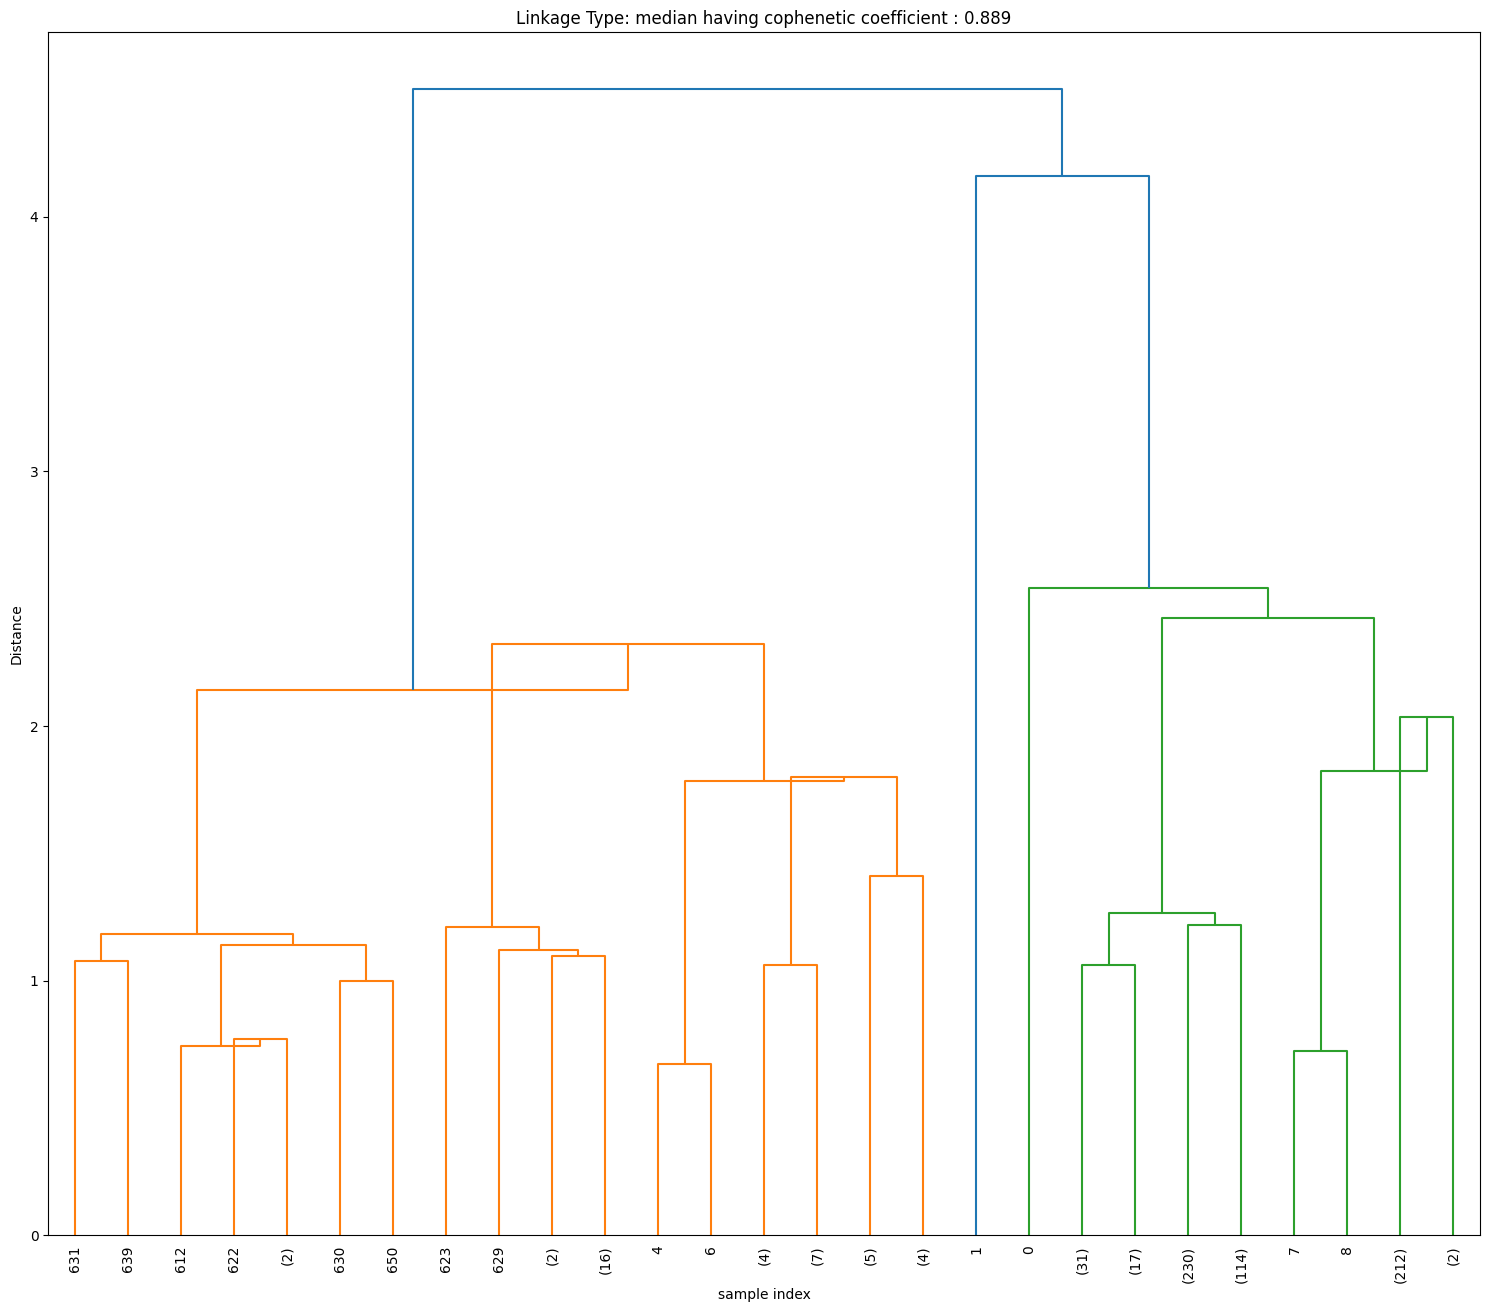

median 0.8893799537016724


In [20]:
linkage_methods=['single','complete','average','ward','median']
results_cophenetic_coef=[]
for i in linkage_methods :
    plt.figure(figsize=(15, 13))
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    Z = linkage(subset_scaled_df, i)
    cc,cophn_dist=cophenet(Z,pdist(subset_scaled_df))
    dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
    plt.tight_layout()
    plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)

In [21]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

,LinkageMethod,CopheneticCoefficient
0,single,0.739122
1,complete,0.859973
2,average,0.897708
3,ward,0.741516
4,median,0.889380


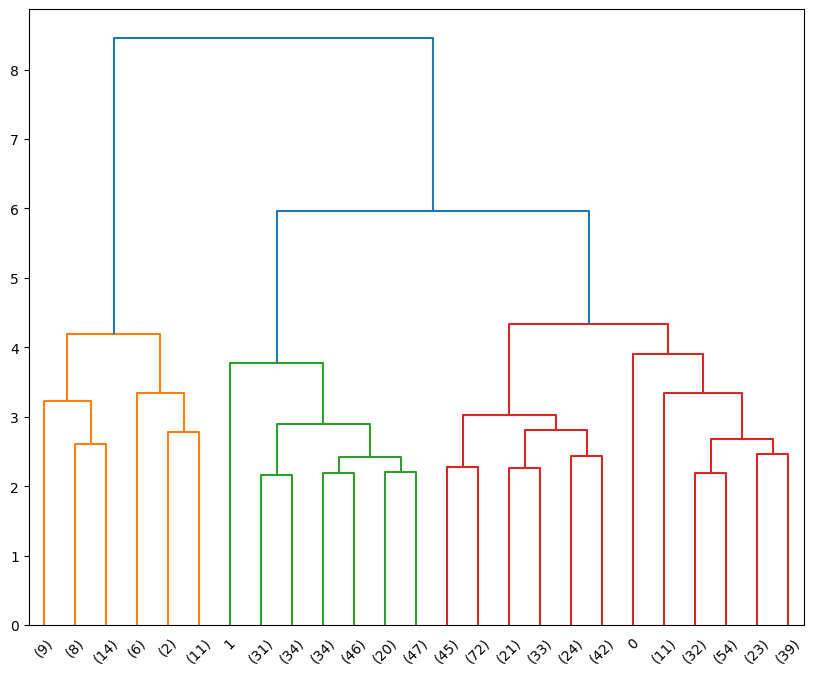

In [22]:
#use truncate_mode='lastp' to select last p formed clusters
plt.figure(figsize=(10,8))
Z = linkage(subset_scaled_df, 'complete', metric='euclidean')

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25 # show only the last p merged clusters
)
plt.show()

In [23]:
max_d=5
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
set(clusters)  # So there are 3 clusters which are formed

{1, 2, 3}

In [24]:
dataset2=subset_scaled_df[:] #Create a duplicate of the dataset
dataset2['HierarchicalClusteringLabel']=clusters
dataset2.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HierarchicalClusteringLabel
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,3
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,3


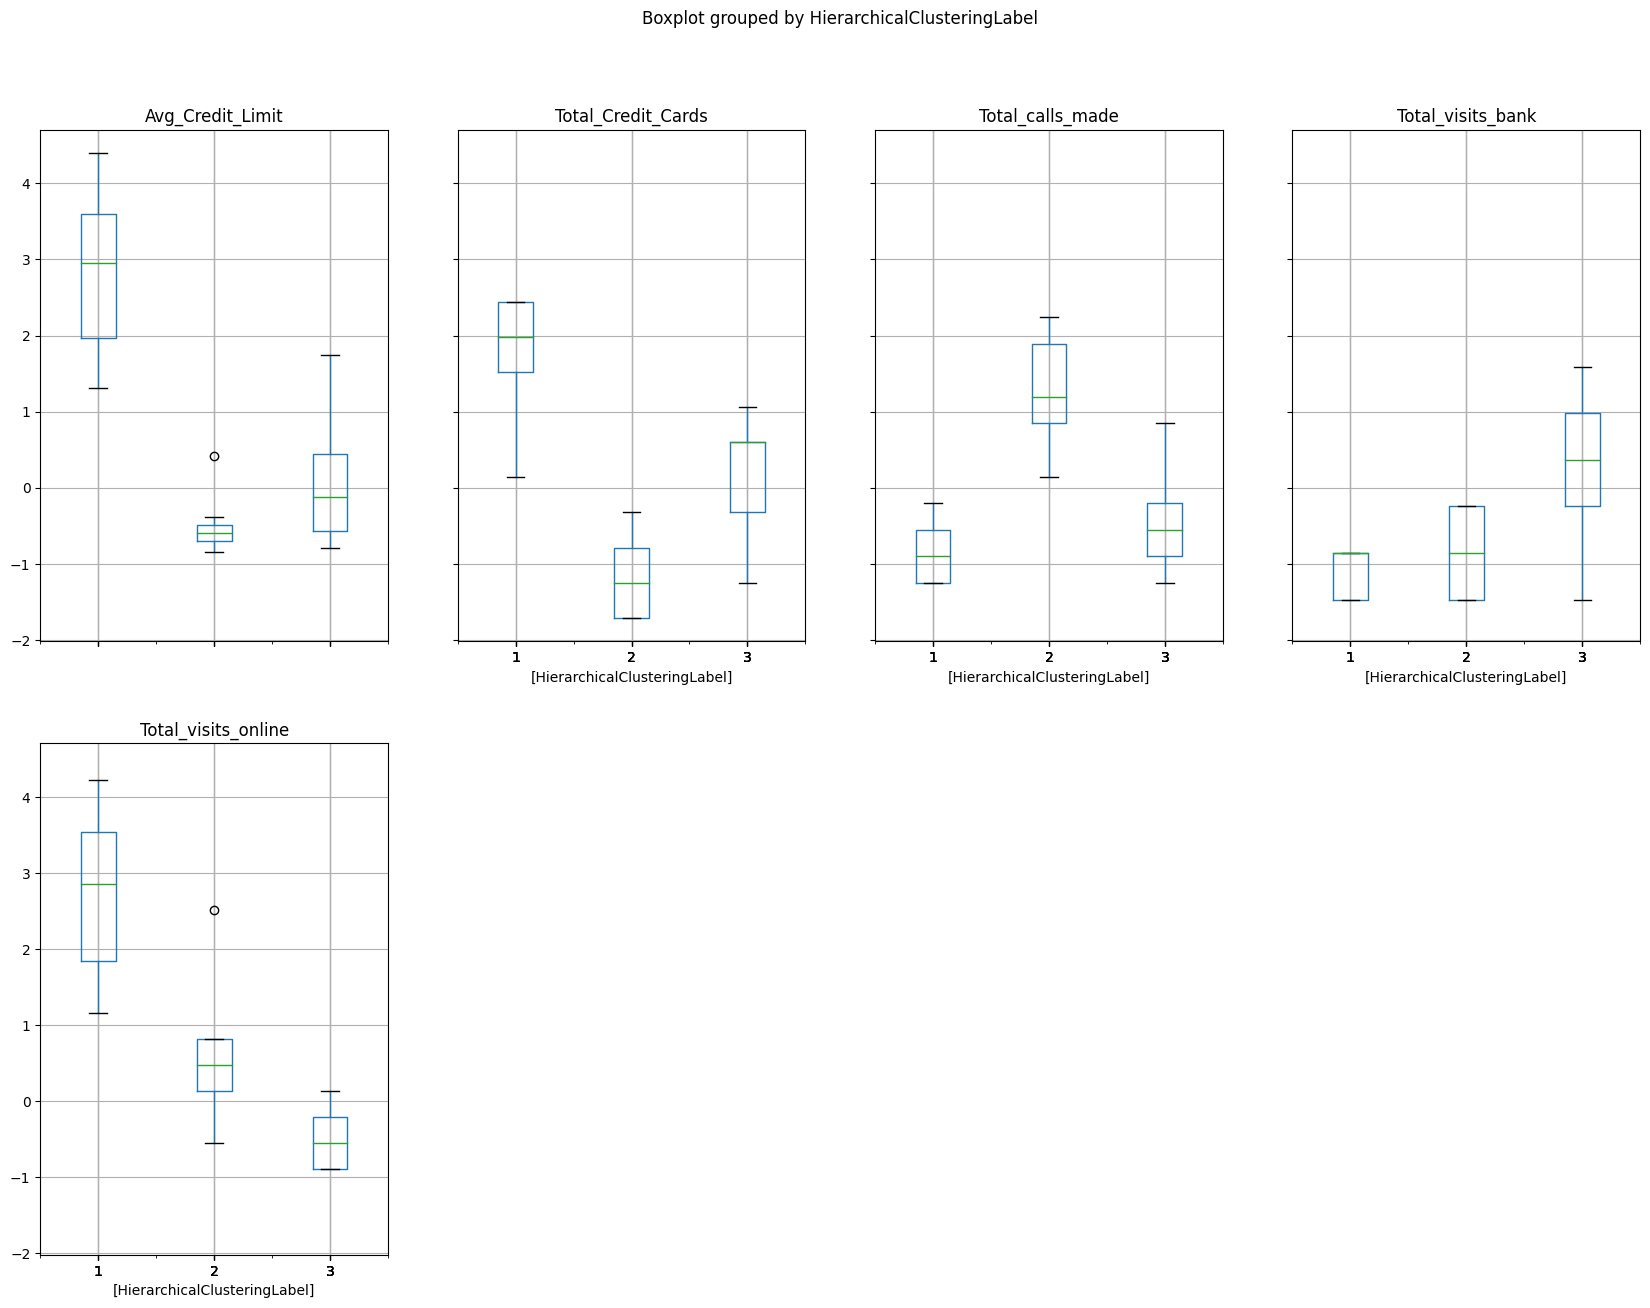

In [25]:
dataset2.boxplot(by = 'HierarchicalClusteringLabel',  layout=(2,4), figsize=(20, 15))
plt.show()

In [26]:
from sklearn.metrics import silhouette_score
silhouette_score(dataset.drop('KmeansLabel',axis=1),dataset['KmeansLabel'])

0.5157182558881063

In [27]:
from sklearn.metrics import silhouette_score
silhouette_score(dataset2.drop('HierarchicalClusteringLabel',axis=1),dataset2['HierarchicalClusteringLabel'])

0.5026435522438492

In [28]:
Kmeans_results=dataset.groupby('KmeansLabel').mean()
Kmeans_results

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
KmeansLabel,,,,,
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


In [29]:
Hierarchical_results=dataset2.groupby('HierarchicalClusteringLabel').mean()
Hierarchical_results

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
HierarchicalClusteringLabel,,,,,
1,2.831764,1.862226,-1.105763,2.827319,-0.874330
2,-0.594183,-1.086676,-0.886364,0.350347,1.196606
3,-0.037852,0.348490,0.614820,-0.544055,-0.531891


In [30]:
Kmeans_results.index=['G1','G2','G3']
Kmeans_results

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
G1,-0.595796,-1.059623,-0.901518,0.322997,1.148109
G2,-0.021062,0.373690,0.666395,-0.553672,-0.553005
G3,2.831764,1.862226,-1.105763,2.827319,-0.874330


In [31]:
Hierarchical_results.index=['G3','G1','G2']
Hierarchical_results.sort_index(inplace=True)
Hierarchical_results

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
G1,-0.594183,-1.086676,-0.886364,0.350347,1.196606
G2,-0.037852,0.348490,0.614820,-0.544055,-0.531891
G3,2.831764,1.862226,-1.105763,2.827319,-0.874330


<Axes: >

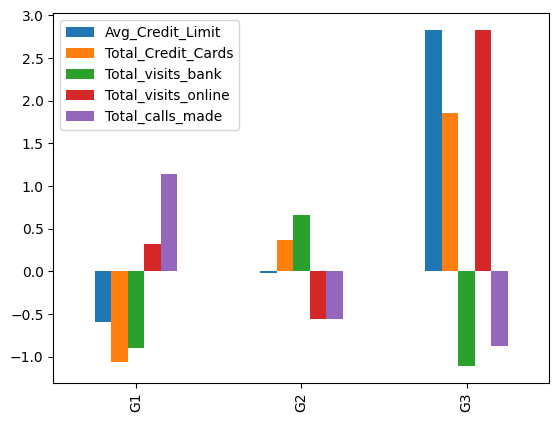

In [32]:
Kmeans_results.plot.bar()

<Axes: >

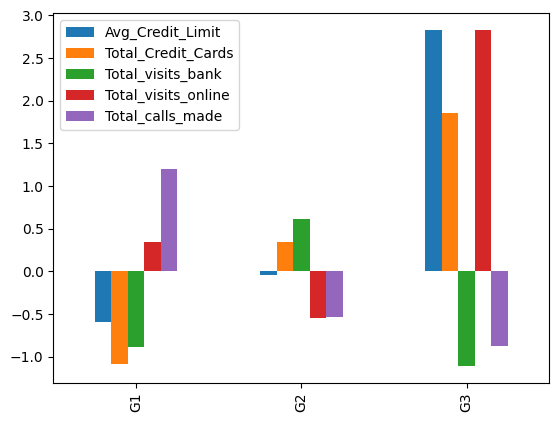

In [33]:
Hierarchical_results.plot.bar()

In [34]:
subset['KmeansLabel']=dataset['KmeansLabel']
# Understanding each feature characterstics within different clusters
for each in cols_to_consider:
    print (each)
    print ( subset.groupby('KmeansLabel').describe().round()[each][['count','mean','min','max']])
    
    print ("\n\n")

Avg_Credit_Limit
             count      mean      min       max
KmeansLabel                                    
0            224.0   12174.0   3000.0   50000.0
1            386.0   33782.0   5000.0  100000.0
2             50.0  141040.0  84000.0  200000.0



Total_Credit_Cards
             count  mean  min   max
KmeansLabel                        
0            224.0   2.0  1.0   4.0
1            386.0   6.0  2.0   7.0
2             50.0   9.0  5.0  10.0



Total_visits_bank
             count  mean  min  max
KmeansLabel                       
0            224.0   1.0  0.0  2.0
1            386.0   3.0  1.0  5.0
2             50.0   1.0  0.0  1.0



Total_visits_online
             count  mean  min   max
KmeansLabel                        
0            224.0   4.0  1.0  10.0
1            386.0   1.0  0.0   3.0
2             50.0  11.0  6.0  15.0



Total_calls_made
             count  mean  min   max
KmeansLabel                        
0            224.0   7.0  1.0  10.0
1            3